## Group 21 Project Proposal -- Car Purchase Amount For Different Genders

In [1]:
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(digest)
library(testthat)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




# Introduction

Understanding consumer behaviour and the various factors that influence decision making by consumers forms an integral part of understanding how the market works, the impact on the state of demand and supply, and eventually the functioning of the economy. Therefore, it is vital to study the various aspects of consumers' identities to determine which aspects do in fact influence the decisions they make with regards to consumption, and if a definitive relationship between certain characteristics and purchasing decisions exists. 

As mentioned in Boston Globe, men tend to shop longer and spend more than women in car stores (Boston Globe, 2012). The CarGurus study, which examined gender differences in car-shopping behavior, found the average price of the cars for which male shoppers submitted purchase inquiries was 13% higher than for female shoppers (Corkran, C., & Writer, C, 2012).

In our case, that is exactly what we are setting out to do. We are looking at a market centered around car sales and the amount a consumer is likely to spend on cars given certain characteristics. Our specific question is to determine whether there is a significant difference in the mean car purchase amount of males and females. 

#### Hence, the question we are seeking to answer is as follows:
#### Is there a significant difference in the mean car purchase amount of two genders?

# Preliminary Results

#### The first step in our process is to read the data from the web (i.e. for us, the wesbite Kaggle).

In [2]:
url <- "https://raw.githubusercontent.com/SugarLucas/group21/main/car_purchasing.csv"

#### Next, we import our data in the form of a data frame, in order to continue our data analysis. 

In [3]:
car <- read_csv(url)

Rows: 500 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): customer name, customer e-mail, country
dbl (6): gender, age, annual Salary, credit card debt, net worth, car purcha...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
#replace the blank spaces in the variable names
names(car)<-str_replace_all(names(car), c(" " = "." , "," = "", "-" = "_"))

### Now, we need to display our data frame. 

In [5]:
head(car)

customer.name,customer.e_mail,country,gender,age,annual.Salary,credit.card.debt,net.worth,car.purchase.amount
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradipiscing.co.uk,Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


The columns in the dataset are:
1. customer.name: Customer's name
2. customer.e_mail: Customer's email
3. country: Customer's country
4. gender: Customer's gender
5. age: Customer's age
6. annual.Salary: Customer's annual salary (dollars)
7. credit.card.debt: Customer's credit card debt (dollars)
8. net worth: Customer's net worth
9. car.purchase.amount: overall amount that consumers would spend to purchase car (dollars)

#### Now that we can view the data, we proceed to filter the meaningful columns which can be analyzed.

In [6]:
car_relevant <- select(car, -customer.name, -customer.e_mail)
head(car_relevant)

country,gender,age,annual.Salary,credit.card.debt,net.worth,car.purchase.amount
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bulgaria,0,41.85172,62812.09,11609.381,238961.3,35321.46
Belize,0,40.87062,66646.89,9572.957,530973.9,45115.53
Algeria,1,43.15290,53798.55,11160.355,638467.2,42925.71
Cook Islands,1,58.27137,79370.04,14426.165,548599.1,67422.36
Brazil,1,57.31375,59729.15,5358.712,560304.1,55915.46
Liberia,1,56.82489,68499.85,14179.472,428485.4,56612.00


In [7]:
#get a brief summary of the dataset
summary(car_relevant)

   country              gender           age        annual.Salary   
 Length:500         Min.   :0.000   Min.   :20.00   Min.   : 20000  
 Class :character   1st Qu.:0.000   1st Qu.:40.95   1st Qu.: 54392  
 Mode  :character   Median :1.000   Median :46.05   Median : 62916  
                    Mean   :0.506   Mean   :46.24   Mean   : 62127  
                    3rd Qu.:1.000   3rd Qu.:51.61   3rd Qu.: 70118  
                    Max.   :1.000   Max.   :70.00   Max.   :100000  
 credit.card.debt   net.worth       car.purchase.amount
 Min.   :  100    Min.   :  20000   Min.   : 9000      
 1st Qu.: 7398    1st Qu.: 299824   1st Qu.:37630      
 Median : 9655    Median : 426750   Median :43998      
 Mean   : 9608    Mean   : 431476   Mean   :44210      
 3rd Qu.:11799    3rd Qu.: 557324   3rd Qu.:51255      
 Max.   :20000    Max.   :1000000   Max.   :80000      

In [8]:
mean(car_relevant$gender) 

[1] 0.506

This tells us that the number of males and females are roughly the same.

#### filter relevant columns

In [9]:
gender_data <- car_relevant %>%
                mutate(gender = as.factor(gender)) %>%
                select(gender, car.purchase.amount) %>%
                na.omit() %>%
                mutate(gender = recode(gender, `0`= "Female", `1`= "Male"))

In [10]:
head(gender_data)

gender,car.purchase.amount
<fct>,<dbl>
Female,35321.46
Female,45115.53
Male,42925.71
Male,67422.36
Male,55915.46
Male,56612.00


### We use histogram to get a brief view of relationship between gender and car purchase amount

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



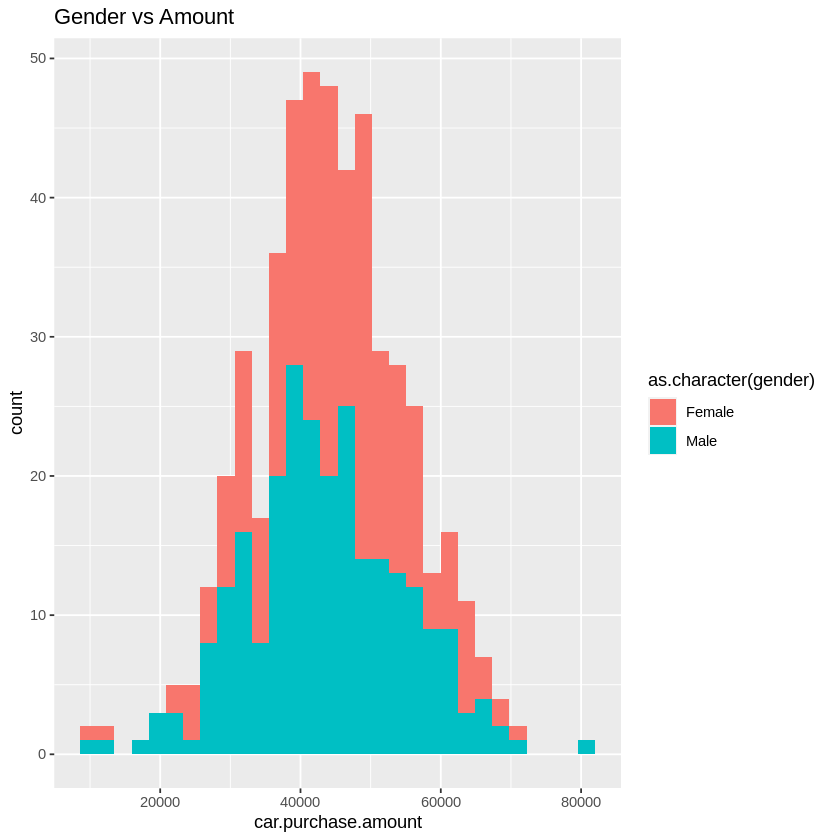

In [11]:
#histogram of amount of two genders(0:female, 1: male)
genderplot <- gender_data %>%
ggplot(aes(car.purchase.amount,fill = as.character(gender))) + 
geom_histogram() + 
ggtitle("Gender vs Amount")

genderplot

### Now we proceed to plot the distributions for both populations (referring to males and females from this point forward).

In [12]:
# histogram of male
male_plot <- gender_data %>%
                filter(gender == "Male") %>%   # filter for male's data
                ggplot() +
                geom_histogram(aes(x = car.purchase.amount),color = "white", bins = 15) +
                scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +   
                labs(x = "Car purchase amount") +
                ggtitle("Distribution of \nMale Car Purchase Amount")


# histogram of female
female_plot <- gender_data %>%
                filter(gender == "Female") %>%  # filter for female's data
                ggplot() +
                geom_histogram(aes(x = car.purchase.amount),color = "white", bins = 15) +
                scale_x_continuous(labels = scales::dollar_format(scale = .001, suffix = "K")) +
                labs(x = "Car purchase amount") +
                ggtitle("Distribution of \nFemale Car Purchase Amount")

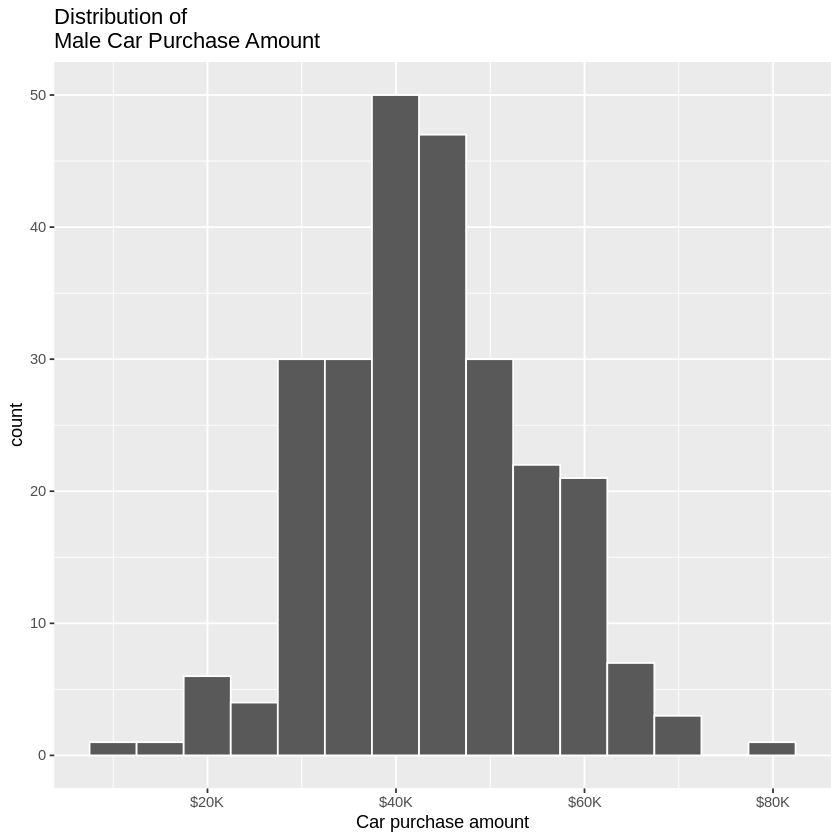

In [13]:
male_plot

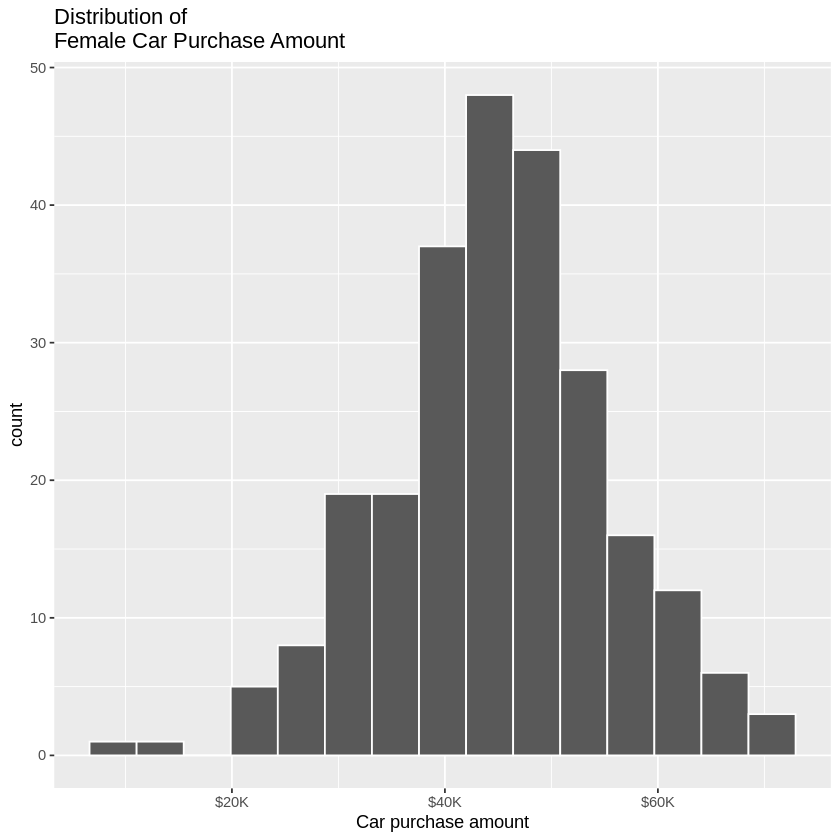

In [14]:
female_plot

#### Boxplot to compare these two genders

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


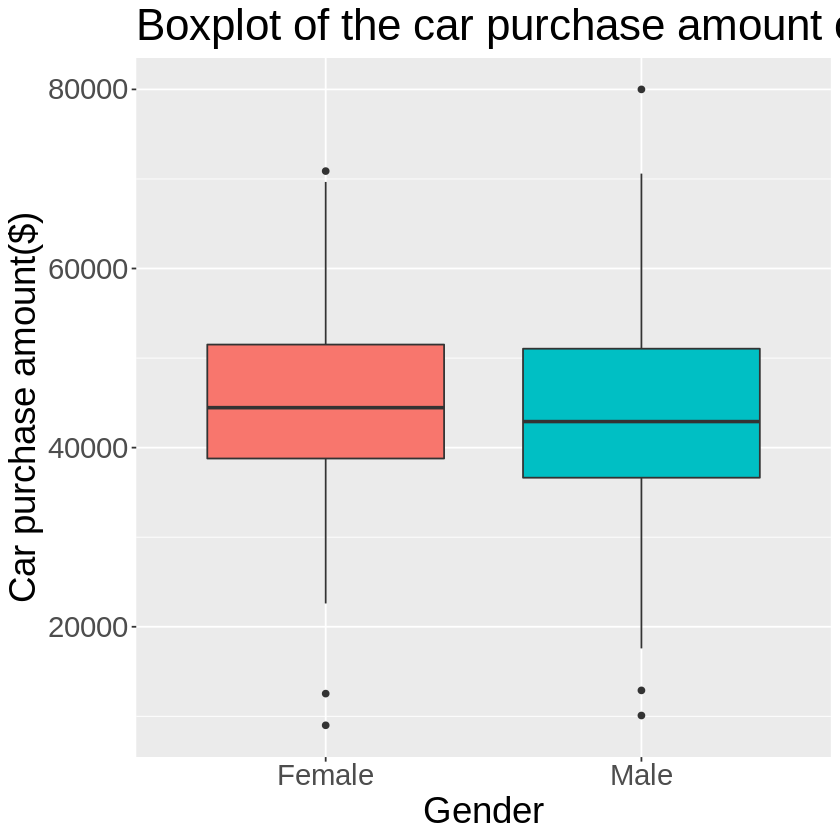

In [15]:
gender_boxplots <-
    gender_data %>%
    ggplot() +
    geom_boxplot(aes(gender, car.purchase.amount, fill = gender)) +
    theme(text = element_text(size = 22)) +
    ggtitle("Boxplot of the car purchase amount of two genders") + 
    xlab("Gender") + 
    ylab("Car purchase amount($)") + 
    guides(fill = FALSE)

gender_boxplots

#### Point estimates of mean, median, standard deviation for each group

In [16]:
gender_data_summary <- gender_data %>% 
    group_by(gender) %>% 
    summarize(Mean_amount = mean(car.purchase.amount),
              Median_amount = median(car.purchase.amount),
              SD_amount = sd(car.purchase.amount),
              Num_Observations = n())

gender_data_summary

gender,Mean_amount,Median_amount,SD_amount,Num_Observations
<fct>,<dbl>,<dbl>,<dbl>,<int>
Female,44933.13,44463.31,10325.99,247
Male,43503.62,42909.27,11167.77,253


# Method

We will use hypothesis testing then.
#### Null hypothesis: the means of car purchase amount are the same for males and females.
#### Alternative hypothesis: the means of car purchase amount are not the same for males and females.

Remember the question we were trying to answer from the beginning: _Is there a significant difference in the mean car purchase amount of two genders?_

To answer this question, we will test the following hypotheses:
$$H_0: \mu_{\text{Female}} - \mu_{\text{Male}} = 0$$ $$H_1: \mu_{\text{Female}} - \mu_{\text{Male}} \neq 0$$
using the following test statistic:
$$
T = \frac{\bar{x}_{\text{Female}} - \bar{x}_{\text{Male}}}{\sqrt{\frac{s^2_{\text{Female}}}{n_1}+\frac{s^2_{\text{Male}}}{n_2}}}
$$
where $\bar{x}_{\text{Female}}$ and $\bar{x}_{\text{Male}}$ are the sample means of car purchase amount for females and males, respectively; $s^2_{\text{Female}}$ and $s^2_{\text{Male}}$ are the sample variances for the females and males, respectively; and $n_1$ and $n_2$ are the sample size for females and males, respectively. 

Our plan is to firstly use the bootstrapping method and calculate test statistic T.

Secondly, we will calculate p-value based on T in 5% significance level, which is the probability of obtaining a test statistic as extreme or even more extreme. And also compare p-value with significance level to get conclusion of our question.

Thirdly, we will calculate the 95% confidence interval to see a range of estimates for the difference in means.

Lastly, we will find the probabilities of Type I and Type II Errors and also power of our test. This helps us establish statistical significance of our findings, because we are trying to reduce probabilities of these two errors.

#### What is your point estimate?
Our point estimate is the mean of the car purchase amount of each gender.

#### How do you quantify the errors of your estimates?
Errors of our estimate are standard error, which is standard deviation / sqrt(n).

#### What do you expect to find?
We expect to find that there is a significant difference in the car purchase amount between males and females. Based on studies, there is a link between gender and car purchase amounts.

#### What are the potential challenges/drawbacks?
The dataset we are using only have about 500 samples which is not large enough for a very trustable result. Also we did not consider many other factors like area, salary, debt... so further research might be needed for a more complete report.

#### How do you make sure your analysis is reproducible?
We set the same seed for each random sample we took such as bootstrapping.


# Reference

Dataset: Yashpal. (2022, September 30). Ann - car sales price prediction. Kaggle. Retrieved November 6, 2022, from https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction 

Corkran, C., &amp; Writer, C. (2012, August 15). Study shows men spend more time and money car shopping than women. Digital Dealer. Retrieved November 6, 2022, from https://digitaldealer.com/dealer-gm/study-shows-men-spend-more-time-and-money-car-shopping-than-women/#:~:text=The%20CarGurus%20study%2C%20which%20examined,%2415%2C485%20for%20female%20shoppers). 

The Boston Globe. (2012, August 27). Differences in how men and women car shop. Boston.com. Retrieved November 6, 2022, from https://www.boston.com/cars/news-and-reviews/2012/08/27/differences-in-how-men-and-women-car-shop/ 